<a href="https://colab.research.google.com/github/KarthikeyanBM/Projects/blob/main/Iot_heart_dis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [38]:
df = pd.read_csv("iot ds.csv")
df.head()

,female,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,...,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM),Target
0,1,39,0.00,0,0,0,195.00,106.00,70.00,26.97,...,55.00,0,0,0,0,12.00,0,0,0,1
1,0,46,0.00,0,0,0,250.00,121.00,81.00,28.73,...,53.00,0,0,0,0,12.40,0,0,0,1
2,1,48,0.00,0,0,0,245.00,127.50,80.00,25.34,...,50.00,0,0,0,0,14.30,0,0,0,1
3,0,61,0.00,0,1,0,225.00,150.00,95.00,28.58,...,51.00,0,0,0,0,15.00,0,0,0,1
4,0,46,0.00,0,0,0,285.00,130.00,84.00,23.10,...,52.00,0,0,0,0,15.00,0,0,0,1


**EXPLORATORY DATA ANALYSIS**

In [39]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,female,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,...,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM),Target
count,3525.00,3525.00,3481.00,3525.00,3525.00,3525.00,3483.00,3525.00,3525.00,3506.00,...,2524.00,3525.00,3525.00,3525.00,3525.00,3525.00,3525.00,3525.00,3525.00,3525.00
mean,0.43,49.60,0.03,0.01,0.31,0.02,237.31,132.22,82.88,25.80,...,46.47,0.50,0.36,0.36,0.26,13.96,0.45,0.29,0.39,0.50
std,0.49,8.56,0.17,0.07,0.46,0.15,44.85,21.91,11.80,4.06,...,10.80,0.50,0.48,0.48,0.44,1.86,0.50,0.46,0.49,0.50
min,0.00,32.00,0.00,0.00,0.00,0.00,107.00,83.50,50.00,15.54,...,15.00,0.00,0.00,0.00,0.00,8.80,0.00,0.00,0.00,0.00
25%,0.00,42.00,0.00,0.00,0.00,0.00,207.00,117.00,75.00,23.08,...,42.00,0.00,0.00,0.00,0.00,12.70,0.00,0.00,0.00,0.00
50%,0.00,49.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.35,...,49.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00,0.00,0.00
75%,1.00,56.00,0.00,0.00,1.00,0.00,264.00,143.50,90.00,28.09,...,55.00,1.00,1.00,1.00,1.00,15.00,1.00,1.00,1.00,1.00
max,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,...,70.00,1.00,1.00,1.00,1.00,18.00,1.00,1.00,1.00,1.00


<Axes: >

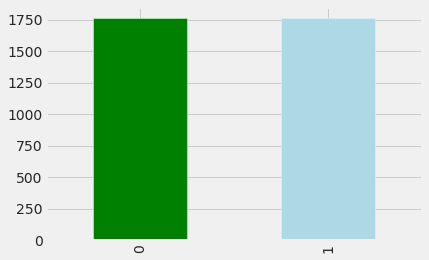

In [40]:
df.Target.value_counts().plot(kind="bar", color=["green", "lightblue"])

In [41]:
df.isna().sum()

female                                0
age                                   0
BPMeds                               44
prevalentStroke                       0
prevalentHyp                          0
diabetes                              0
totChol                              42
sysBP                                 0
diaBP                                 0
BMI                                  19
heartRate                             1
glucose                             324
TenYearCHD                            0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
Target                                0


In [42]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

female : [1 0]
age : [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
BPMeds : [ 0.  1. nan]
prevalentStroke : [0 1]
prevalentHyp : [0 1]
diabetes : [0 1]
totChol : [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176. 163. 191. 263. 196. 310. 164. 135. 238. 207. 342. 287. 182. 352.
 284. 217. 203. 262. 129. 155. 323. 206. 283. 319. 304. 340. 328. 280.
 368. 218. 276. 339. 231. 198. 177. 201. 277. 184. 199

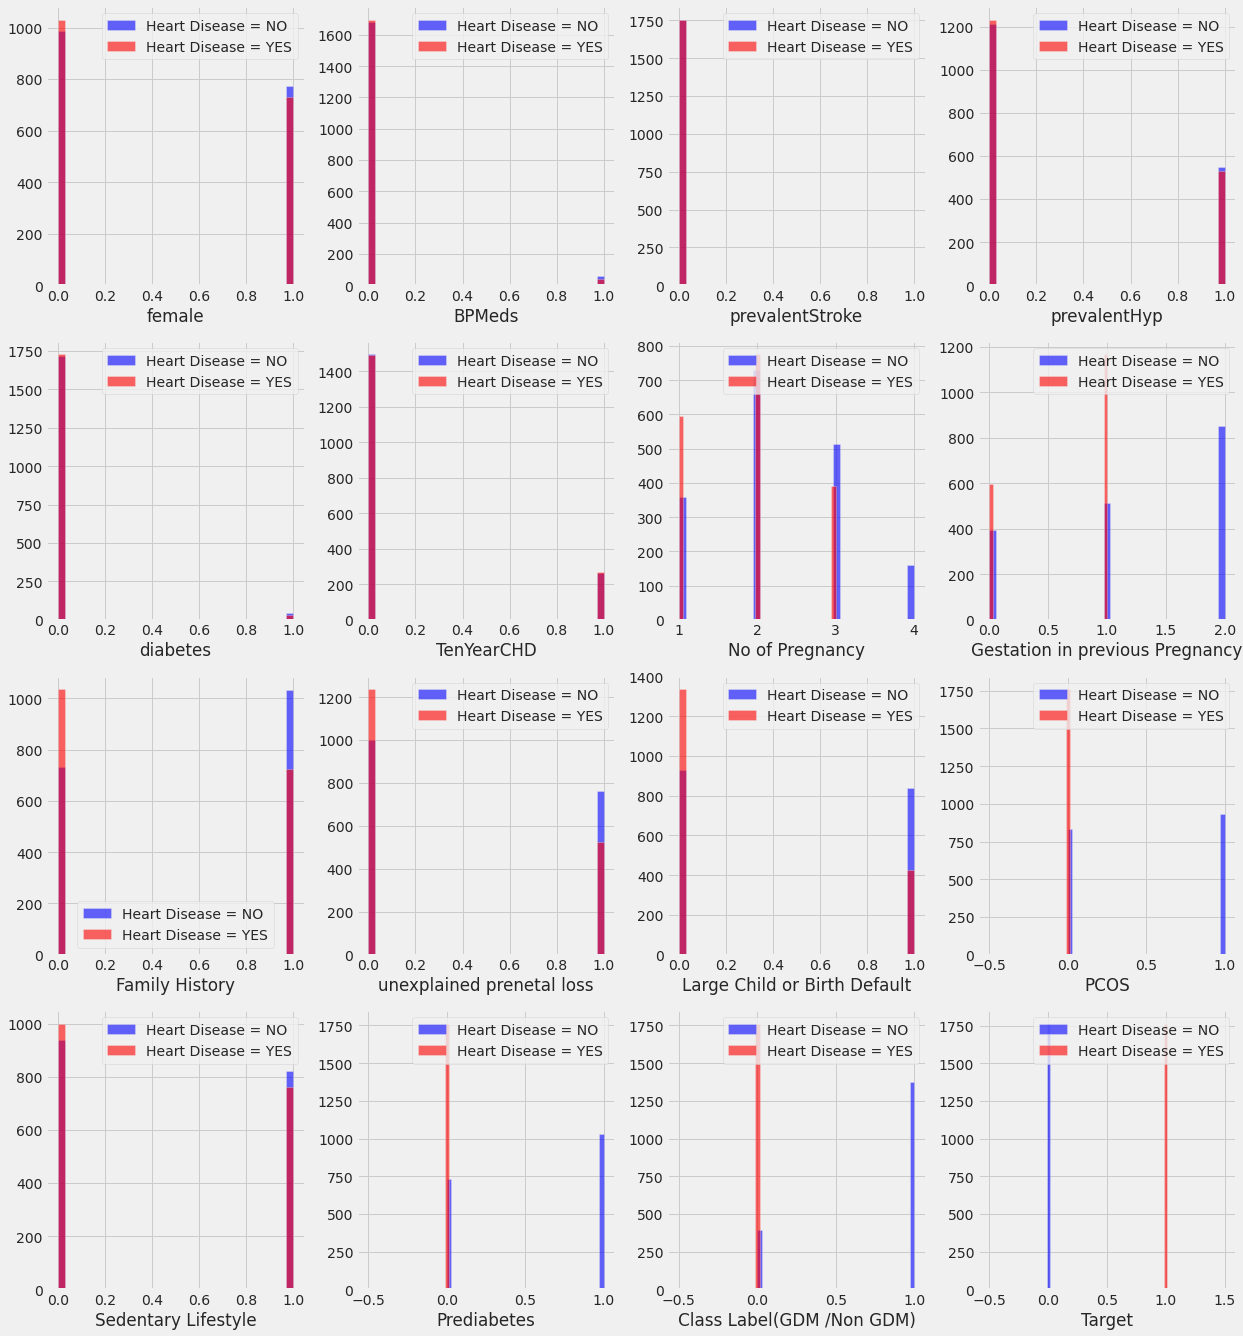

In [43]:
plt.figure(figsize=(19, 22))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(4,4,i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Heart Disease = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

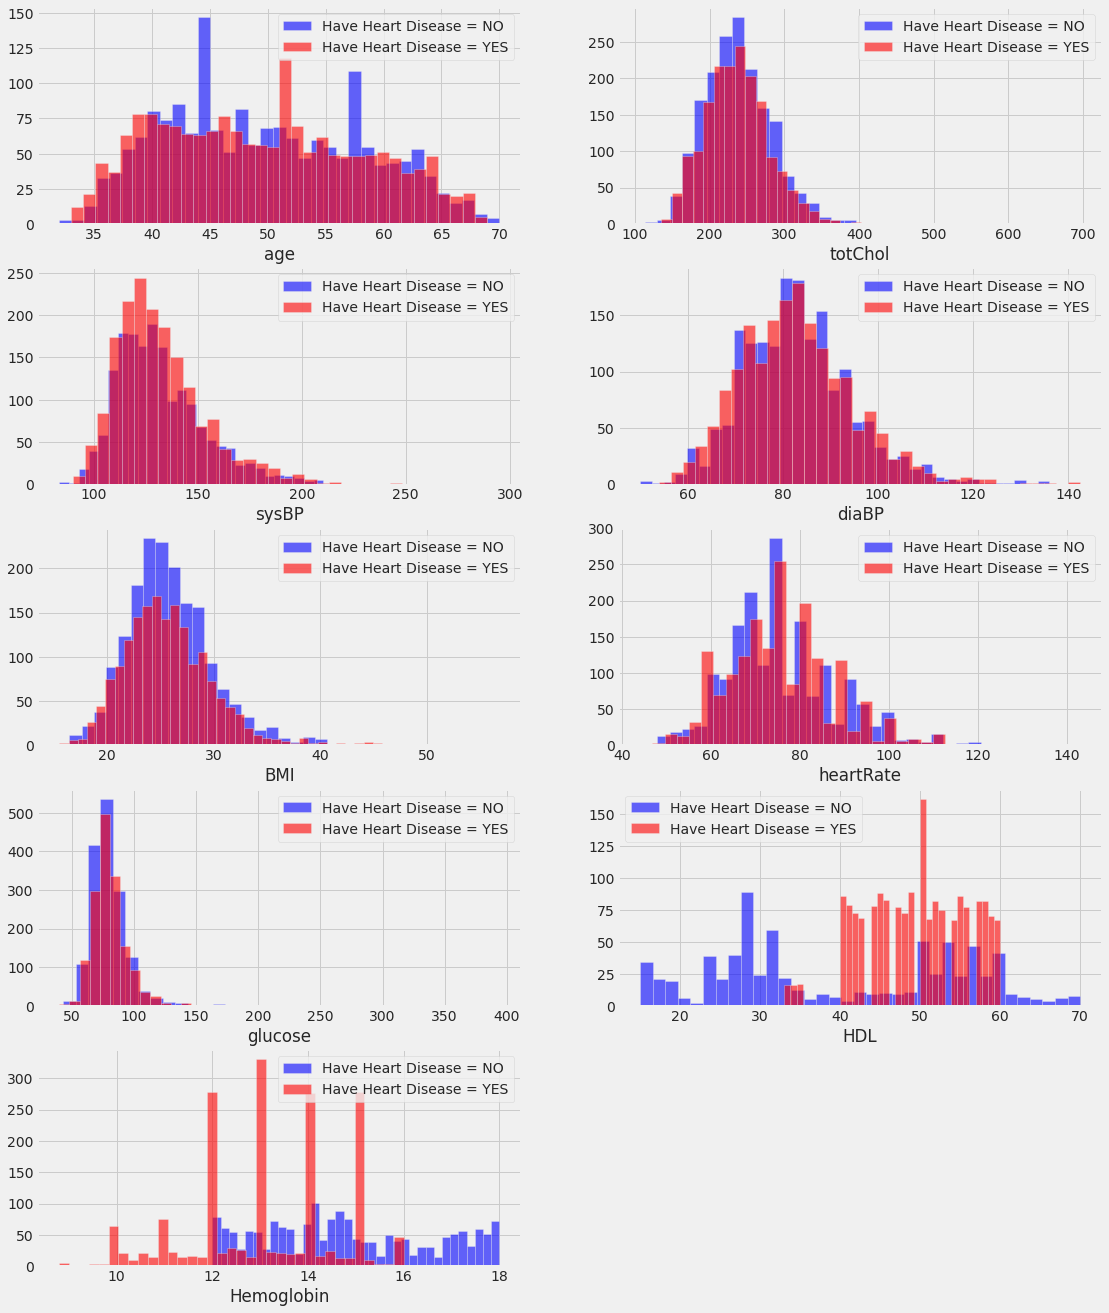

In [44]:
plt.figure(figsize=(17, 35))

for i, column in enumerate(continous_val, 1):
    plt.subplot(8, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**COMPARISION B/W AGE AND DIABETES FOR PREVELANCE OF HEART DISEASE**

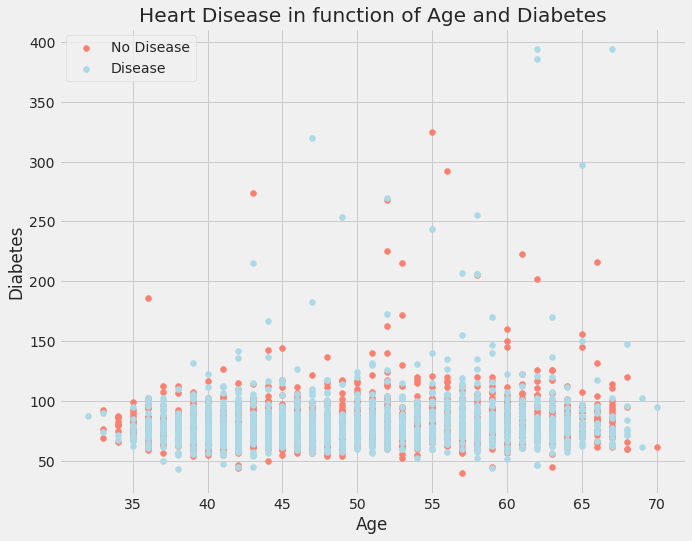

In [48]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.Target==1],
            df.glucose[df.Target==1],c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.Target==0],
            df.glucose[df.Target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Diabetes")
plt.xlabel("Age")
plt.ylabel("Diabetes")
plt.legend(["No Disease", "Disease"]);

**CORRELATION MATRIX**

(25.5, -0.5)

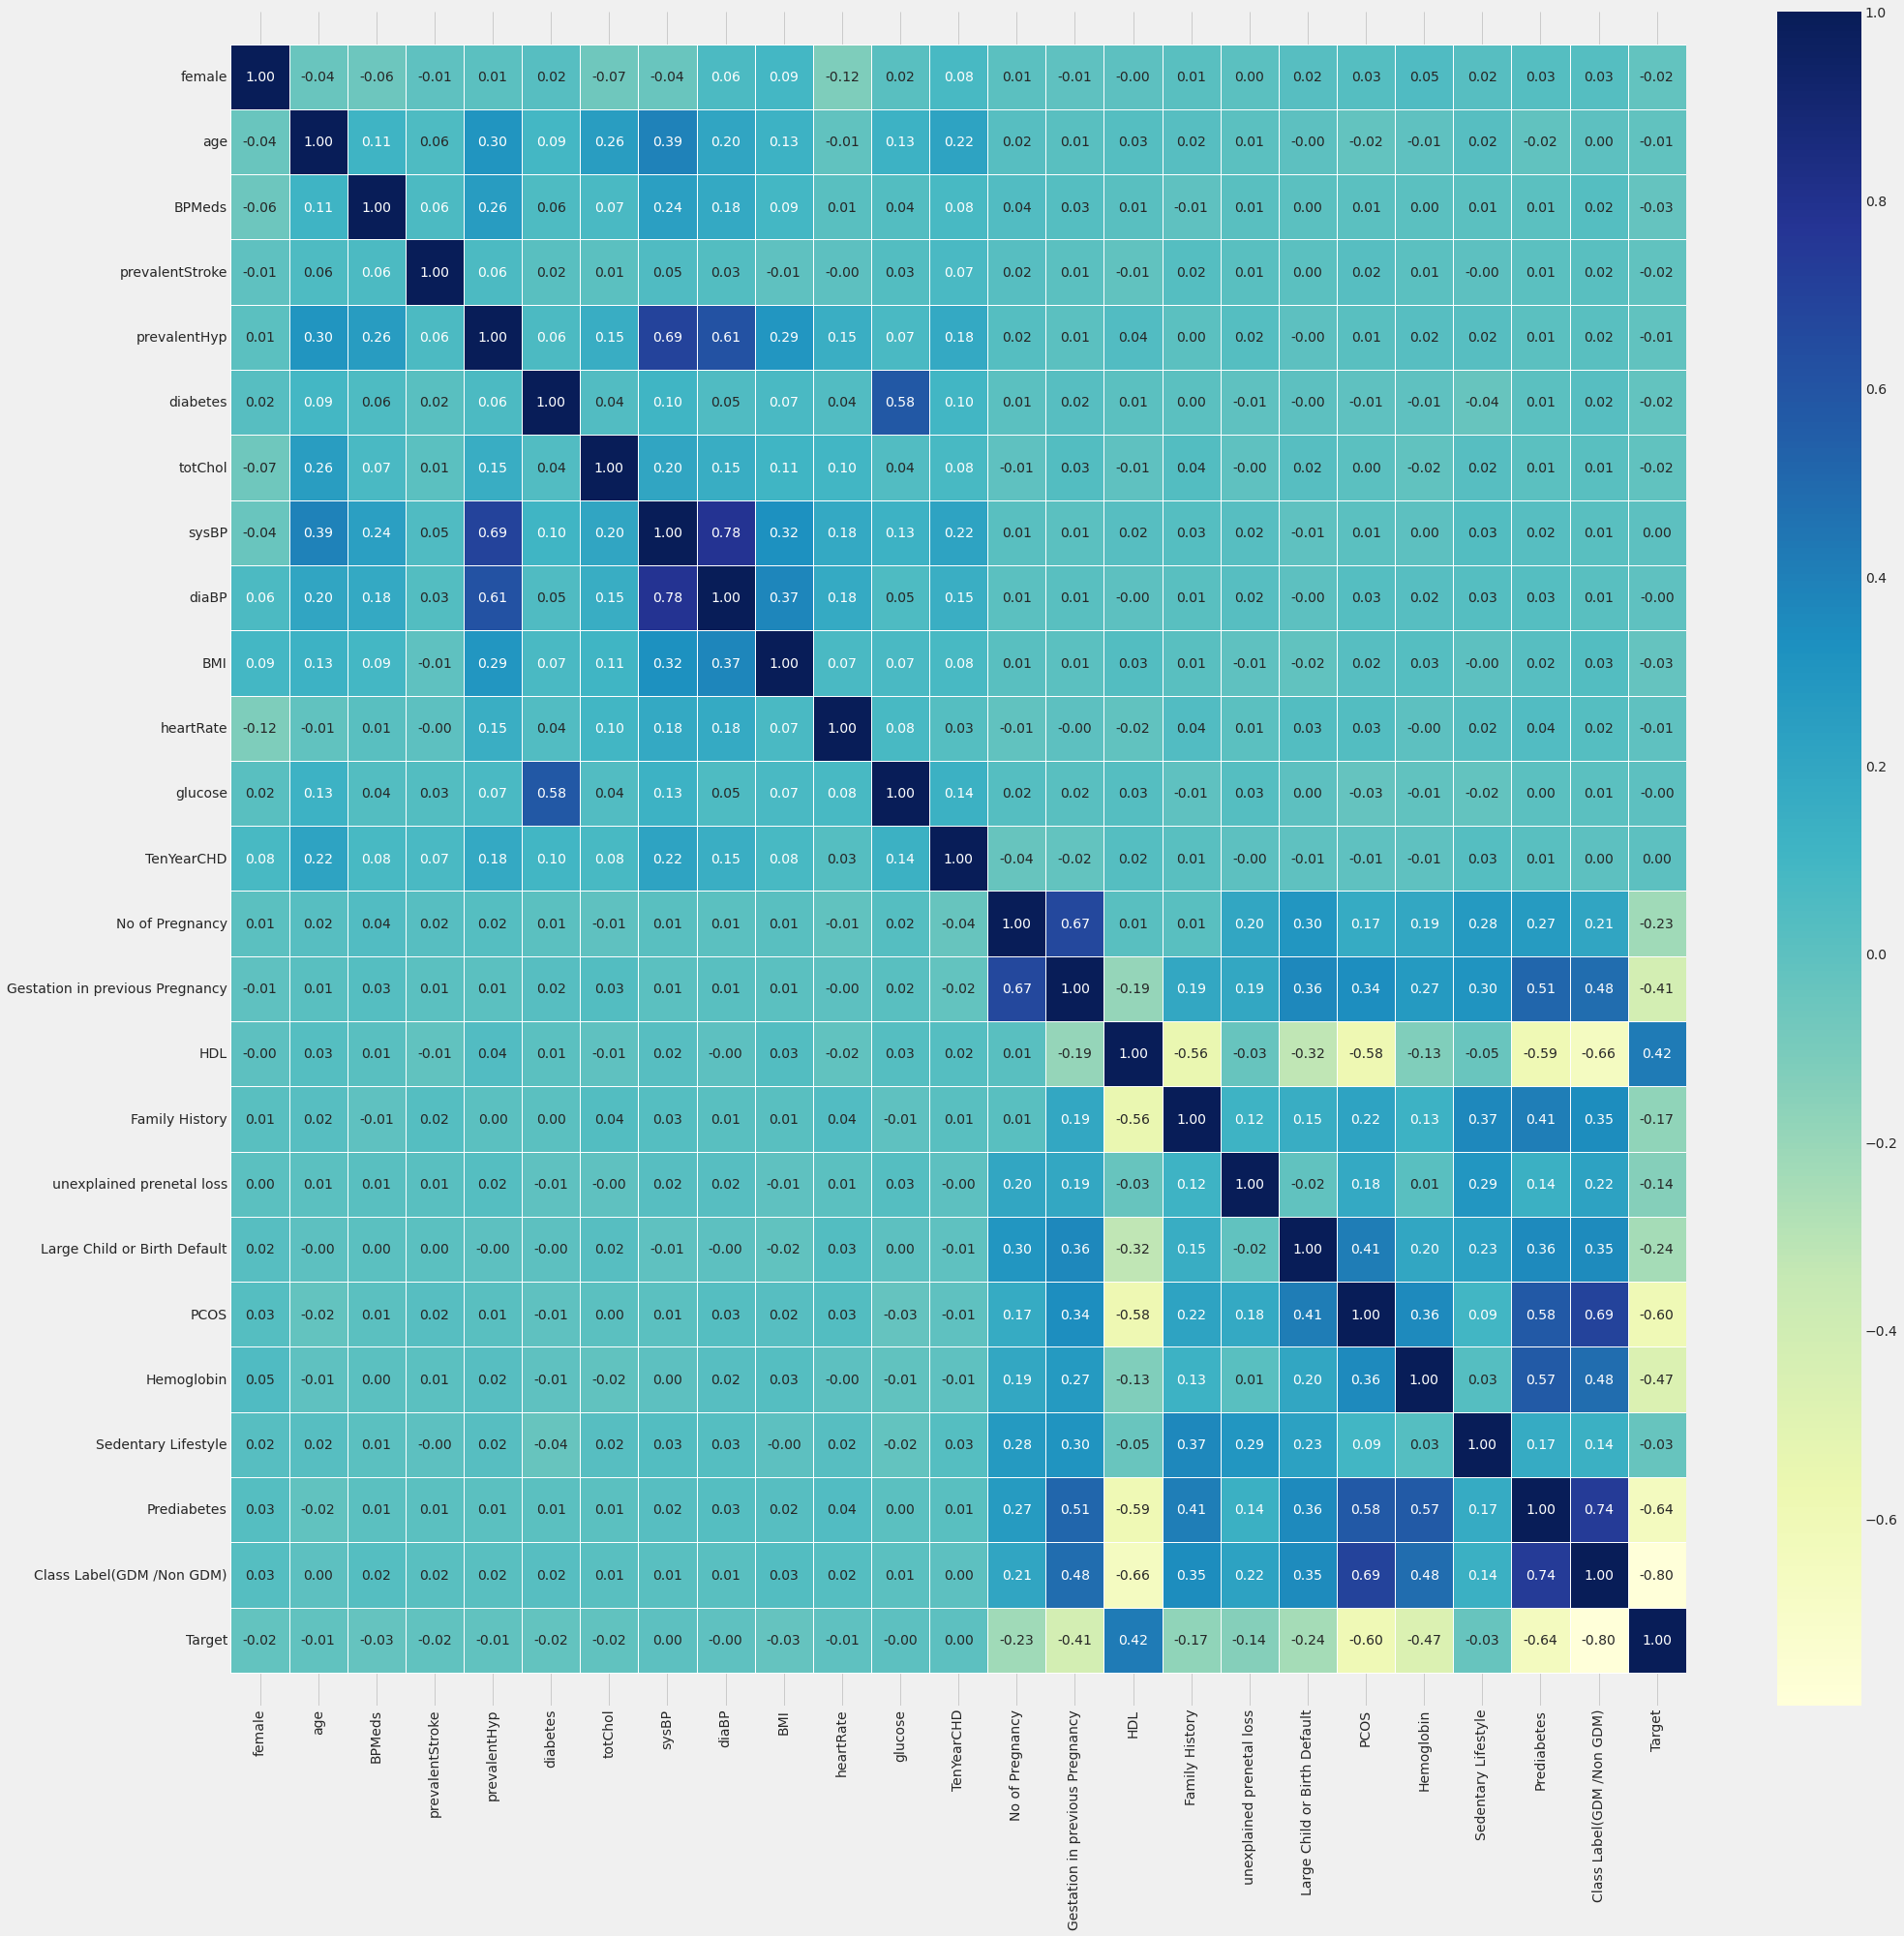

In [49]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with Target'}>

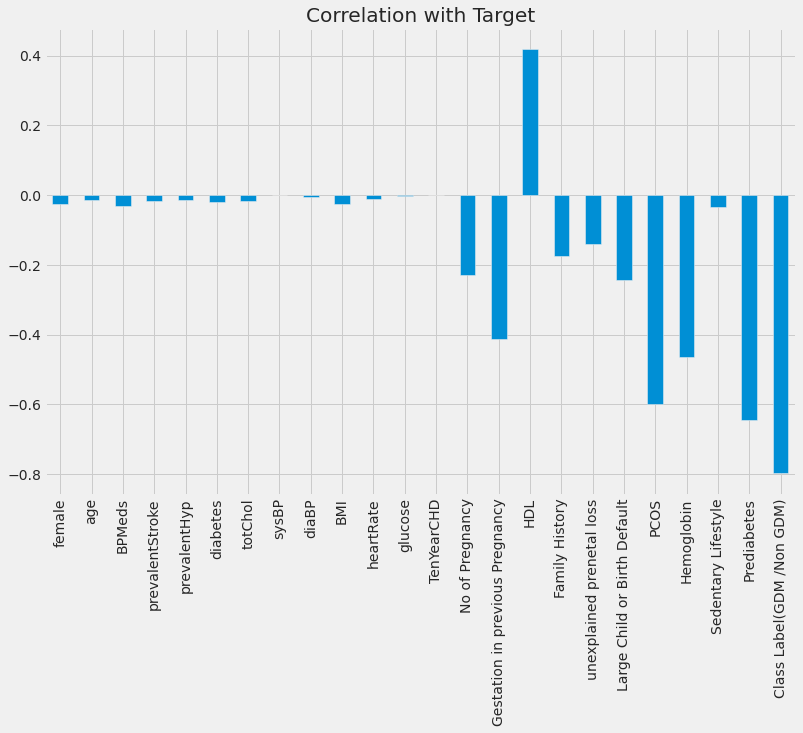

In [51]:
df.drop('Target', axis=1).corrwith(df.Target).plot(kind='bar', grid=True, figsize=(12, 8),title="Correlation with Target")